In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import IPython
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (24,24) #in inches
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize']=13
plt.rcParams['ytick.labelsize']=13
plt.rcParams['legend.fontsize']=13
plt.rcParams['lines.linewidth']=2

In [3]:
data = pd.read_excel('4304376.f1.xls', index_col = 0)

In [4]:
data.shape

(10508, 20)

In [ ]:
data.head()

In [ ]:
data.isnull().mean().sort_values(ascending=False)

In [ ]:
data.dtypes

### Explore the dataset
1. There are null values. <br /> 
   --Need to fill null value with median value using Imputer.
2. Gender is a categorial feature.  <br /> 
   --Need to do transformation using OneHotEncoder.
3. Features are not on the same scale. <br />
   --Need to be normalized using StandardScaler.
4. The target (Ultrasound) is binary: 0/1.
5. There dataset is slightly imbalanced. <br /> 

4. It may be better to divide Ages into groups.

#### Examintion of  the target column revealed that the dataset is imbalanced.
1. Use oversampling to make it balanced

In [270]:
data.Ultrasound.value_counts()

0    7986
1    2522
Name: Ultrasound, dtype: int64

In [17]:
ratio = data.Ultrasound.value_counts()

In [31]:
print("Percentage of class 0 :", round(ratio[0]/(ratio[0]+ratio[1]), 2))
print("Percentage of class 1 :", round(ratio[1]/(ratio[0]+ratio[1]), 2))

Percentage of class 0 : 0.76
Percentage of class 1 : 0.24


In [33]:
data.describe()

,Age,Gender,Height,Weight,ALT,AST,ALP,GGT,TB,DB,IB,TC,TG,HDL,LDL,Bun,Cr,Glu,Uric,Ultrasound
count,10508.000000,10508.000000,10459.000000,10458.000000,10502.000000,10501.000000,10502.000000,10502.000000,10502.000000,10502.000000,10502.000000,10502.000000,10502.000000,10502.000000,10497.000000,10502.000000,10502.000000,10502.000000,10502.000000,10508.000000
mean,47.925105,0.654549,166.505957,64.879642,19.203485,22.414056,81.065892,28.919444,13.474995,4.203228,9.271767,4.864458,1.329480,1.523141,2.701942,5.103034,67.050943,5.108324,325.562179,0.240008
std,14.557494,0.475538,8.028204,10.901562,16.575712,10.698080,22.864494,35.889982,5.632849,1.562651,4.334529,0.907671,0.980809,0.347437,0.748060,1.350484,18.951579,0.972233,82.594194,0.427108
min,21.000000,0.000000,102.000000,35.000000,0.000000,3.000000,17.000000,6.000000,3.600000,1.600000,0.600000,2.140000,0.230000,0.510000,0.100000,1.680000,25.000000,2.830000,23.000000,0.000000
25%,37.000000,0.000000,161.000000,57.000000,11.000000,17.000000,66.000000,14.000000,9.700000,3.200000,6.400000,4.250000,0.770000,1.270000,2.180000,4.200000,57.000000,4.600000,267.000000,0.000000
50%,47.000000,1.000000,167.000000,64.000000,15.000000,20.000000,78.000000,20.000000,12.400000,3.900000,8.500000,4.800000,1.080000,1.480000,2.660000,4.940000,66.000000,4.930000,321.500000,0.000000
75%,58.000000,1.000000,172.000000,72.000000,22.000000,25.000000,93.000000,31.000000,16.200000,4.900000,11.400000,5.430000,1.590000,1.730000,3.140000,5.820000,75.000000,5.330000,378.000000,0.000000
max,89.000000,1.000000,194.000000,166.000000,637.000000,313.000000,369.000000,1365.000000,114.800000,74.800000,86.000000,10.680000,17.000000,3.590000,8.670000,31.010000,830.000000,18.360000,778.000000,1.000000


In [ ]:
data.hist(grid=False,bins=20, alpha = 0.9, figsize = (22, 30))

In [ ]:
import pdfkit as pdf
data.to_html('test.html')
PdfFilename='pdfPrintOut.pdf'
pdf.from_file('test.html', PdfFilename)

In [39]:
# Find correlation coefficient matrix for Iris dataset
corr_matrix=data.corr()
# set_precision define the decimal numbers
corr_matrix.style.background_gradient().set_precision(2)

,Age,Gender,Height,Weight,ALT,AST,ALP,GGT,TB,DB,IB,TC,TG,HDL,LDL,Bun,Cr,Glu,Uric,Ultrasound
Age,1,-0.15,-0.32,-0.043,-0.073,0.096,0.16,0.051,-0.075,-0.089,-0.065,0.19,0.091,0.086,0.13,0.25,0.026,0.28,-8.3e-05,0.11
Gender,-0.15,1,0.69,0.52,0.19,0.11,0.096,0.19,0.26,0.3,0.23,-0.11,0.12,-0.34,-0.036,0.11,0.44,-0.011,0.5,0.12
Height,-0.32,0.69,1,0.61,0.14,0.03,-0.0019,0.11,0.21,0.24,0.19,-0.12,0.056,-0.25,-0.057,0.0095,0.32,-0.076,0.33,0.079
Weight,-0.043,0.52,0.61,1,0.31,0.17,0.086,0.2,0.13,0.16,0.11,0.054,0.25,-0.39,0.098,0.071,0.29,0.087,0.44,0.43
ALT,-0.073,0.19,0.14,0.31,1,0.81,0.19,0.39,0.082,0.13,0.059,0.12,0.21,-0.15,0.098,-0.01,0.062,0.088,0.23,0.31
AST,0.096,0.11,0.03,0.17,0.81,1,0.24,0.49,0.093,0.16,0.063,0.14,0.18,-0.017,0.082,0.029,0.04,0.11,0.19,0.22
ALP,0.16,0.096,-0.0019,0.086,0.19,0.24,1,0.26,0.031,0.074,0.014,0.087,0.15,-0.1,0.065,0.039,0.047,0.11,0.11,0.12
GGT,0.051,0.19,0.11,0.2,0.39,0.49,0.26,1,0.11,0.21,0.063,0.19,0.28,-0.043,0.095,0.011,0.063,0.13,0.26,0.22
TB,-0.075,0.26,0.21,0.13,0.082,0.093,0.031,0.11,1,0.87,0.98,-0.074,0.0096,-0.022,-0.072,-0.016,0.1,-0.013,0.15,0.039
DB,-0.089,0.3,0.24,0.16,0.13,0.16,0.074,0.21,0.87,1,0.78,-0.14,0.1,-0.056,-0.18,-0.011,0.12,-0.0064,0.17,0.063


In [110]:
# only retrieve the correlation
corr_matrix.Ultrasound.sort_values(ascending=False)

Ultrasound    1.000000
Weight        0.433068
TG            0.340199
ALT           0.313111
Uric          0.284872
GGT           0.223252
AST           0.221504
TC            0.179682
Glu           0.177103
LDL           0.137347
ALP           0.123470
Gender        0.120364
Age           0.114844
Height        0.078828
DB            0.062637
Cr            0.051007
TB            0.039312
IB            0.028512
Bun           0.021694
HDL          -0.243348
Name: Ultrasound, dtype: float64

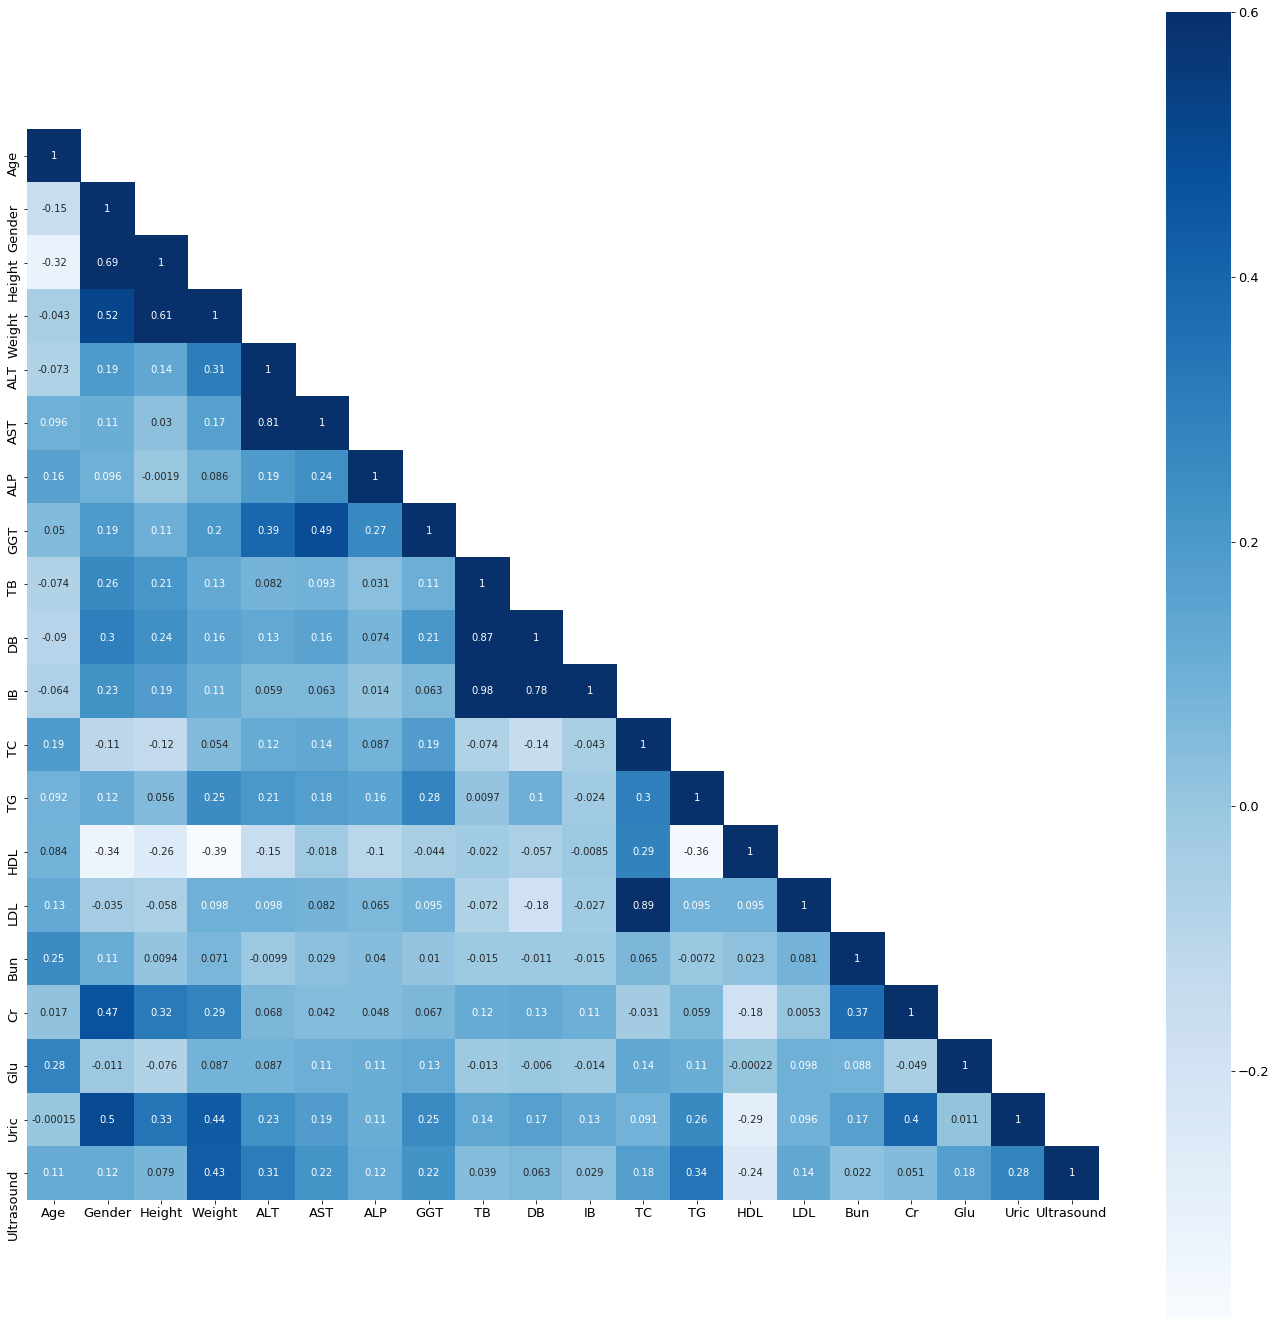

In [321]:
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corr_matrix, mask=mask,vmax=0.6, square=True,annot=True,cmap="Blues")

## Split the whole data into train and test sets as 7 : 3

In [4]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.3, stratify = data.Ultrasound, random_state=42)

In [5]:
print("The size of train_set is: {}".format(train_set.shape[0]))
print("The size of test_set is: {}".format(test_set.shape[0]))

The size of train_set is: 7355
The size of test_set is: 3153


In [115]:
test_set.shape

(3135, 20)

In [116]:
train_set.head()

,Age,Gender,Height,Weight,ALT,AST,ALP,GGT,TB,DB,IB,TC,TG,HDL,LDL,Bun,Cr,Glu,Uric,Ultrasound
Num,,,,,,,,,,,,,,,,,,,,
4649,38,0,153.0,49.0,13.0,23.0,60.0,12.0,7.8,2.2,5.6,6.01,0.96,1.58,3.95,6.21,54.0,4.98,284.0,0
3718,49,1,170.0,69.0,35.0,24.0,67.0,21.0,19.0,5.4,13.6,4.82,1.13,1.16,3.10,4.35,52.0,5.51,317.0,0
2394,46,0,161.0,54.0,21.0,19.0,48.0,13.0,10.7,2.9,7.8,6.11,1.17,1.84,3.68,3.11,46.0,5.45,207.0,0
4693,34,1,174.0,55.0,25.0,36.0,51.0,37.0,12.8,3.6,9.2,6.26,0.69,1.75,4.16,6.75,76.0,5.27,393.0,0
5381,27,0,151.0,43.5,7.0,19.0,64.0,9.0,10.0,3.3,6.7,3.79,0.60,1.35,2.14,3.05,58.0,4.64,150.0,0


In [117]:
label_name = data.columns.tolist()[-1]
label_name

'Ultrasound'

## Sepearte features and labels

In [6]:
def seperate_train_test(dataframe):
    label_name = dataframe.columns.tolist()[-1]
    y = dataframe[label_name]
    X = dataframe.drop(columns = label_name)
    return X, y

In [7]:
X_train, y_train = seperate_train_test(train_set)
X_test, y_test = seperate_train_test(test_set)
X_train.head()

,Age,Gender,Height,Weight,ALT,AST,ALP,GGT,TB,DB,IB,TC,TG,HDL,LDL,Bun,Cr,Glu,Uric
Num,,,,,,,,,,,,,,,,,,,
3050,61,1,163.0,62.0,12.0,22.0,82.0,56.0,22.2,6.0,16.2,4.81,1.39,1.55,2.56,5.01,62.0,5.28,327.0
3895,44,0,165.0,50.0,8.0,15.0,53.0,10.0,6.9,2.1,4.8,4.83,0.91,1.60,2.78,5.48,55.0,4.42,223.0
10282,24,1,169.0,60.0,2.0,18.0,81.0,13.0,15.6,4.3,11.3,4.00,0.86,1.16,2.41,4.21,55.0,4.72,241.0
9253,36,1,173.0,75.0,17.0,19.0,62.0,29.0,12.4,3.9,8.5,4.57,1.47,1.44,2.40,7.08,84.0,4.54,382.0
3667,49,1,180.0,72.0,14.0,21.0,53.0,18.0,17.1,5.0,12.1,2.65,0.78,0.87,1.39,4.24,71.0,4.50,349.0


In [120]:
y_train.value_counts()

0    5557
1    1756
Name: Ultrasound, dtype: int64

In [121]:
X_test.head()

,Age,Gender,Height,Weight,ALT,AST,ALP,GGT,TB,DB,IB,TC,TG,HDL,LDL,Bun,Cr,Glu,Uric
Num,,,,,,,,,,,,,,,,,,,
5341,27,1,170.0,65.0,27.0,16.0,66.0,21.0,10.7,3.6,7.1,5.48,1.87,1.35,3.20,4.86,61.0,4.77,357.0
6897,78,1,171.0,60.0,17.0,32.0,92.0,16.0,11.3,3.8,7.5,4.20,1.19,1.13,2.48,6.21,83.0,4.26,348.0
9789,68,1,175.0,75.0,11.0,18.0,60.0,19.0,13.2,3.6,9.6,4.23,0.90,1.09,2.69,4.41,98.0,5.82,413.0
137,58,1,175.0,88.0,13.0,17.0,105.0,24.0,15.8,4.5,11.3,4.35,0.55,1.62,2.46,7.45,94.0,4.62,414.0
116,70,0,156.0,51.5,5.0,24.0,49.0,13.0,11.7,3.4,8.3,4.41,0.85,1.51,2.48,4.97,54.0,6.52,265.0


In [122]:
y_test.value_counts()

0    2382
1     753
Name: Ultrasound, dtype: int64

### Set up numeric pipeline and categorical pipeline and combine them to a full_process_pipeline

### Define the column name of numeric attributes and categorial attributes separeately

In [8]:
cat_attributes = ['Gender']

In [127]:
# a easy way to get column names from a dataframe
num_a = list(X_train)
num_a

['Age',
 'Gender',
 'Height',
 'Weight',
 'ALT',
 'AST',
 'ALP',
 'GGT',
 'TB',
 'DB',
 'IB',
 'TC',
 'TG',
 'HDL',
 'LDL',
 'Bun',
 'Cr',
 'Glu',
 'Uric']

In [9]:
num_attributes = X_train.columns.drop('Gender')
num_attributes

Index(['Age', 'Height', 'Weight', 'ALT', 'AST', 'ALP', 'GGT', 'TB', 'DB', 'IB',
       'TC', 'TG', 'HDL', 'LDL', 'Bun', 'Cr', 'Glu', 'Uric'],
      dtype='object')

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [13]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = "median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = "median")),
    ("encoder", OneHotEncoder(categories='auto'))
])

In [14]:
from sklearn.compose import ColumnTransformer

process_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attributes),
    ('cat', cat_pipeline, cat_attributes) 
])

X_train_prepared = process_pipeline.fit_transform(X_train)
X_test_prepared = process_pipeline.transform(X_test)

### Try the model of KNN

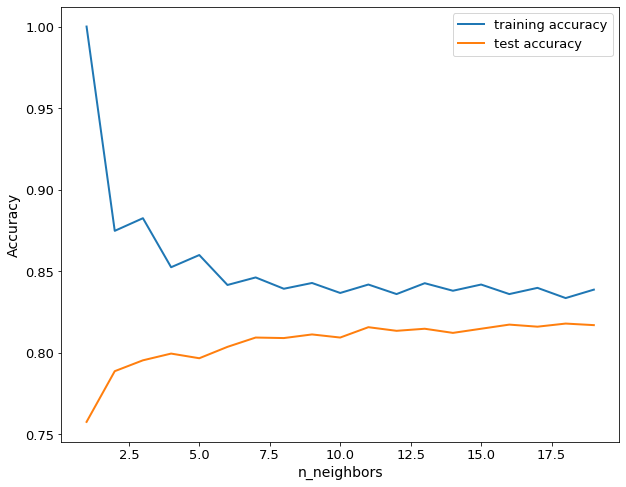

In [279]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
n_neighbors_range = range(1, 20)

for i in n_neighbors_range:
    # build the model
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_prepared, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train_prepared, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test_prepared, y_test))
plt.figure(figsize = (10, 8))    
plt.plot(n_neighbors_range, training_accuracy, label="training accuracy")
plt.plot(n_neighbors_range, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train_prepared, y_train)
print("Training accuracy is: ", knn.score(X_train_prepared, y_train))
print("Testing accuracy is: ", knn.score(X_test_prepared, y_test))

Training accuracy is:  0.8418762746430999
Testing accuracy is:  0.8157310497938471


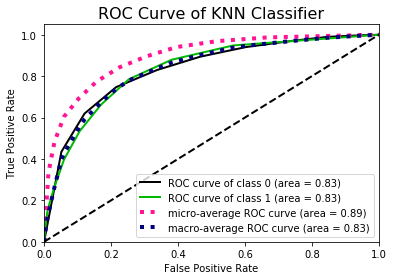

In [217]:
y_probas = knn.predict_proba(X_test_prepared) # predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.title('ROC Curve of KNN Classifier')
plt.show()

### Try Naive Bayeses model

In [17]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_prepared, y_train)
print("Training accuracy is: ", nb.score(X_train_prepared, y_train))
print("Testing accuracy is: ", nb.score(X_test_prepared, y_test))

Training accuracy is:  0.8058463630183549
Testing accuracy is:  0.7967015540754837


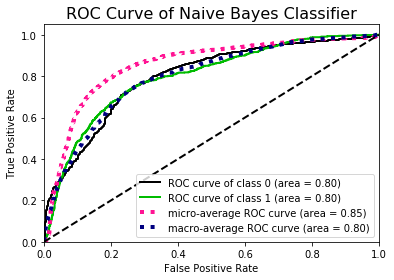

In [219]:
y_probas = nb.predict_proba(X_test_prepared) # predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.title('ROC Curve of Naive Bayes Classifier')
plt.show()

### Try Decision Tree model

### Add the visualization of decision tree and feature_importances

In [18]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 46, max_depth = 5)
tree.fit(X_train_prepared, y_train)
print("Training accuracy is: ", tree.score(X_train_prepared, y_train))
print("Testing accuracy is: ", tree.score(X_test_prepared, y_test))

Training accuracy is:  0.8365737593473828
Testing accuracy is:  0.8182683158896289


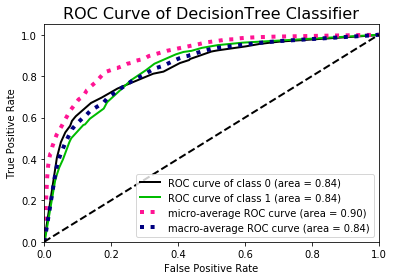

In [316]:
y_probas =tree.predict_proba(X_test_prepared) # predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.title('ROC Curve of DecisionTree Classifier')
plt.show()

In [134]:
X_train_prepared[:2]

array([[-0.6783049 , -1.69983814, -1.46635378, -0.39476784,  0.06329269,
        -0.91814296, -0.46647499, -1.02013723, -1.24682553, -0.86399813,
         1.26986043, -0.37471765,  0.1684104 ,  1.6771267 ,  0.81497882,
        -0.70682333, -0.1315634 , -0.50726761,  1.        ,  0.        ],
       [ 0.07880459,  0.42899001,  0.38126894,  1.04255947,  0.15860972,
        -0.61438968, -0.22177527,  0.97997173,  0.73374142,  1.00513521,
        -0.04486785, -0.20536839, -1.0420211 ,  0.53616631, -0.55743091,
        -0.81385635,  0.40823998, -0.11086582,  0.        ,  1.        ]])

In [19]:
num_attributes_combine2 = list(num_attributes)+ ["Gender1", 'Gender0']

In [317]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="NALD_tree.dot", feature_names = num_attributes_combine2,
class_names = ['Yes', "No"], impurity=False, filled=True)

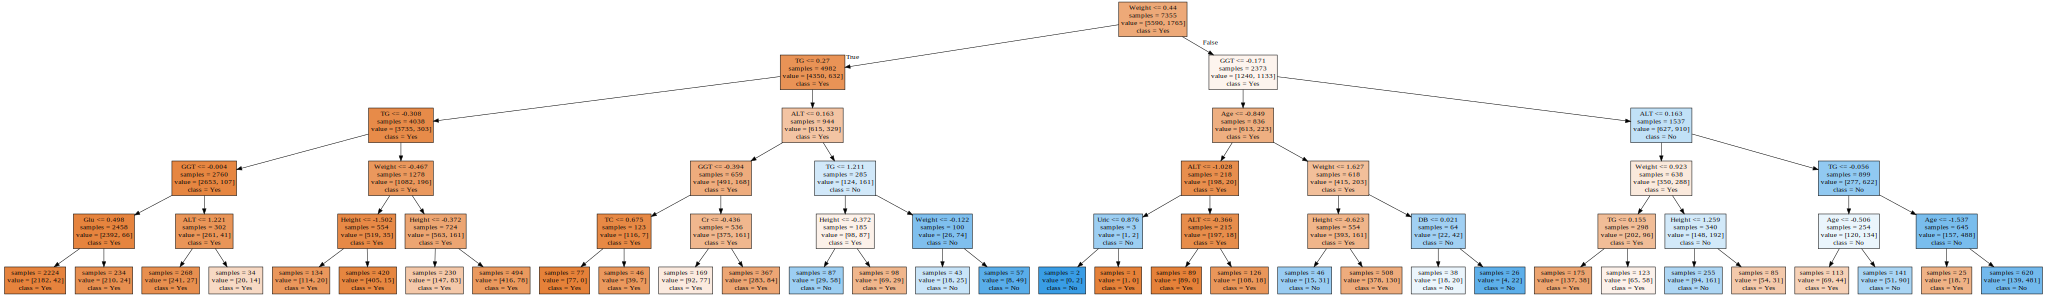

In [318]:
import graphviz

with open("NALD_tree.dot") as f: 
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### Try the random Forest model

In [20]:
from sklearn.ensemble.forest import RandomForestClassifier

In [21]:
forest = RandomForestClassifier(n_estimators = 100, random_state = 46)
forest.fit(X_train_prepared, y_train)
print("Training accuracy is: ", forest.score(X_train_prepared, y_train))
print("Testing accuracy is: ", forest.score(X_test_prepared, y_test))

Training accuracy is:  1.0
Testing accuracy is:  0.8239771646051379


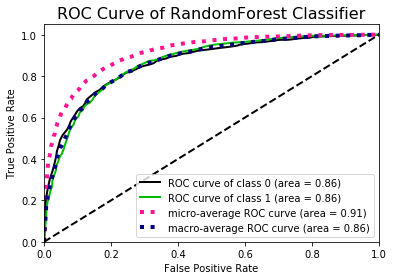

In [221]:
y_probas = forest.predict_proba(X_test_prepared) # predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.title('ROC Curve of RandomForest Classifier')
plt.show()

In [50]:
len(tree.feature_importances_)

20

In [22]:

for label, feature in zip(num_attributes_combine2, tree.feature_importances_):  ## wrong
    print(label,": ", feature)

Age :  0.03927015467536523
Height :  0.05426366908110611
Weight :  0.4681855557668989
ALT :  0.09529748684243337
AST :  0.0
ALP :  0.0
GGT :  0.13856230271340492
TB :  0.0
DB :  0.003294194068230462
IB :  0.0
TC :  0.0013910277573888409
TG :  0.18284301931564703
HDL :  0.0
LDL :  0.0
Bun :  0.0
Cr :  0.012409387012061953
Glu :  0.0030925436895754914
Uric :  0.0013906590778878162
Gender1 :  0.0
Gender0 :  0.0


### Draw a feature importance graph

### Try gradient boosting calssifier

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

In [24]:
gbrt = GradientBoostingClassifier(random_state = 0, max_depth =1)
gbrt.fit(X_train_prepared, y_train)
print("Training accuracy is: ", gbrt.score(X_train_prepared, y_train))
print("Testing accuracy is: ", gbrt.score(X_test_prepared, y_test))

Training accuracy is:  0.8358939496940857
Testing accuracy is:  0.8189026324135744


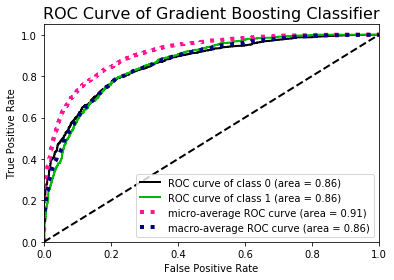

In [222]:
y_probas = gbrt.predict_proba(X_test_prepared) # predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.title('ROC Curve of Gradient Boosting Classifier')
plt.show()

### Try logistic regression model

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
logreg = LogisticRegression(C=100, penalty="l1")
logreg.fit(X_train_prepared, y_train)
print("Training accuracy is: ", logreg.score(X_train_prepared, y_train))
print("Testing accuracy is: ", logreg.score(X_test_prepared, y_test))

Training accuracy is:  0.8394289598912305
Testing accuracy is:  0.8293688550586743


/Users/pengl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Evaluate the model using confusion matrix and the AUC

In [28]:
# C=1 IS BEETER THAN C=10
from sklearn.svm import SVC
svm = SVC(kernel = "rbf", C=1, gamma=0.1)
svm.fit(X_train_prepared, y_train)
print("Training accuracy is: ", svm.score(X_train_prepared, y_train))
print("Testing accuracy is: ", svm.score(X_test_prepared, y_test))

Training accuracy is:  0.892318150917743
Testing accuracy is:  0.8220742150333016


In [29]:
# C=1 IS BEETER THAN C=10
from sklearn.svm import LinearSVC
linear_svm = LinearSVC()
linear_svm.fit(X_train_prepared, y_train)
print("Training accuracy is: ", linear_svm.score(X_train_prepared, y_train))
print("Testing accuracy is: ", linear_svm.score(X_test_prepared, y_test))

Training accuracy is:  0.8398368456832087
Testing accuracy is:  0.8312718046305106


/Users/pengl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
# method in calculating auc scores
from sklearn import metrics
y = np.array([1, 1, 2, 2])
pred = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
metrics.auc(fpr, tpr)

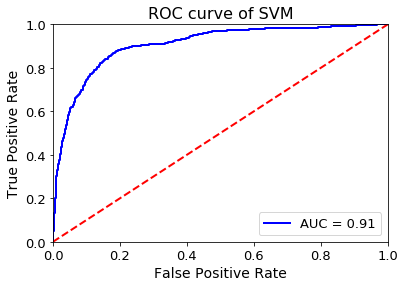

In [286]:
"""
There is difference between svm and other models on retrieving it predict_proba. It use
decison_function instead of predict_proba; also the return is a single column
instead of two columns, the value is also not between 0 and 1

The following are the codes to get predic_proba
probs = model.predict_proba(X_test_prepared)
preds = probs[:,1]


"decision function returns pairwise scores between classes" is incorrect. It should be the "score for each class" 
as it's written in the documentation page for decision_function part: "Distance of the samples X to the separating hyperplane."

"""

from sklearn import metrics
preds = svm.decision_function(X_test_prepared) # predicted probabilities generated by sklearn classifier
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC curve of SVM')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [259]:
y_probas = svm.decision_function(X_test_prepared)

In [30]:
from sklearn.metrics import f1_score
models = [knn, logreg, nb, svm, tree, forest, gbrt]
model_names = ["knn", "logreg", "nb", "svm", "tree","forest", "gbrt"]
for i in range(len(models)):
    y_pred = models[i].predict(X_test_prepared)
    f1 =f1_score(y_test, y_pred, average='binary')
    print(model_names[i], "F1 score: ", f1)

knn F1 score:  0.5399841646872525
logreg F1 score:  0.6008902077151335
nb F1 score:  0.5437722419928827
svm F1 score:  0.5797752808988763
tree F1 score:  0.5694966190833959
forest F1 score:  0.5842696629213484
gbrt F1 score:  0.5556420233463035


In [31]:
from sklearn import metrics

models2 = [knn, logreg, nb, tree, forest, gbrt]
model_names2 = ["knn", "logreg", "nb", "tree","forest", "gbrt"]
for i in range(len(models2)):
    preds_p = models2[i].predict_proba(X_test_prepared)[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds_p)
    roc_auc = metrics.auc(fpr, tpr)
    print(model_names2[i], "Auc: ", roc_auc)

knn Auc:  0.8405521752458411
logreg Auc:  0.874951206656625
nb Auc:  0.8091449752229056
tree Auc:  0.838840273198616
forest Auc:  0.8683492191962386
gbrt Auc:  0.8684095906210926


In [197]:
from sklearn.metrics import confusion_matrix
y_pred = logreg.predict(X_test_prepared)
con_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred)
print("Confusion matrix: \n", con_matrix)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(con_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [200]:
con_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred)
print("Confusion matrix: \n", con_matrix)

Confusion matrix: 
 [[2216  166]
 [ 358  395]]


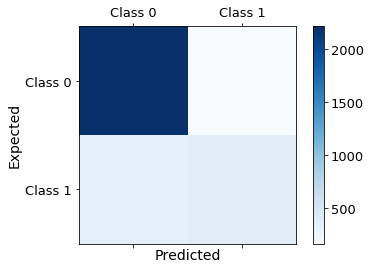

In [202]:
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(con_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()


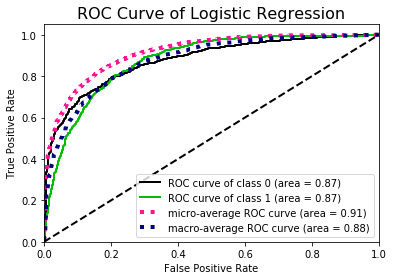

In [294]:
import scikitplot as skplt
y_true = y_test  #ground truth labels
y_probas = logreg.predict_proba(X_test_prepared) # predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.title('ROC Curve of Logistic Regression')
plt.show()

### Try gridSearchCV to fine tune parameters

In [188]:
model = LogisticRegression()
para_grid = [{'C': [0.1, 1, 10, 100]}]
grid_search = GridSearchCV(model, para_grid, cv=10, n_jobs=4)
grid_search.fit(X_train_prepared, y_train)

/Users/pengl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=4, param_grid=[{'C': [0.1, 1, 10, 100]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [190]:
print("Best accuracy is: ", grid_search.best_score_)
print("Best parameter is: ", grid_search.best_params_)
print("Best model is: ", grid_search.best_estimator_)

Best accuracy is:  0.8364556269656775
Best parameter is:  {'C': 0.1}
Best model is:  LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


### To prevent information leaking, add the whole pipe into gridSearchCV()

In [181]:
pipe = Pipeline([
    ('process', process_pipeline),
    ('model', LogisticRegression()),
])

In [184]:
para_grid = [{'model__C': [0.1, 1, 10, 100]}]
grid_search = GridSearchCV(pipe, para_grid, cv=10, n_jobs=4)
grid_search.fit(X_train, y_train)

/Users/pengl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('process',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                        

In [189]:
print("Best accuracy is: ", grid_search.best_score_)
print("Best parameter is: ", grid_search.best_params_)

Best accuracy is:  0.8364556269656775
Best parameter is:  {'C': 0.1}


### Try SVM

In [1]:
y_probas

NameError: name 'y_probas' is not defined

In [234]:
y_probas = logreg.predict_proba(X_test_prepared)
print(y_probas[:10])

[[0.80402726 0.19597274]
 [0.95007281 0.04992719]
 [0.73355781 0.26644219]
 [0.51619844 0.48380156]
 [0.95956422 0.04043578]
 [0.91272429 0.08727571]
 [0.29489266 0.70510734]
 [0.37314696 0.62685304]
 [0.76740124 0.23259876]
 [0.83306915 0.16693085]]


### Crossvalidation of the model using training set

In [162]:
from sklearn.model_selection import GridSearchCV

In [168]:
para_grid = [
    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]},
    {'kernel': ['rbf'], 'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]}  
]

In [172]:
grid_search = GridSearchCV(SVC(), para_grid, cv=5, n_jobs=4)

In [173]:
grid_search.fit(X_train_prepared, y_train)

/Users/pengl/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=4,
             param_grid=[{'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [176]:
print("Best accuracy is: ", grid_search.best_score_)
print("Best parameter is: ", grid_search.best_params_)
print("Best model is: ", grid_search.best_estimator_)

Best accuracy is:  0.8348147135238616
Best parameter is:  {'C': 100, 'kernel': 'linear'}
Best model is:  SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


In [ ]:
evaluate models uing different matric

using gridCV to find the best parameters

In [149]:
## Try deep learning model